<a href="https://colab.research.google.com/github/Nachiketa-shiva/Zomato-restaurant-EDA-/blob/main/Zomato-Restaurant-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zomato-Restaurant-EDA

Use the "Run" button to execute the code.

This dataset provides a comprehensive view of the restaurant scene in the 13 metropolitan areas of India, comprising approximately 900 restaurants. It serves as a valuable resource for researchers, analysts, and food enthusiasts, offering insights into various aspects of the dining industry. The dataset includes information on dining and delivery ratings, customer reviews and preferences, popular cuisines, best-selling items, and pricing details across different cities.

With more than **127,000 rows** and **12 columns**, this dataset offers ample opportunities for data analysis. It enables exploration of dining patterns, comparison of restaurants and cuisines between cities, and identification of trends in the food industry. Analysts can leverage this dataset to gain a deeper understanding of the culinary landscape and make data-driven decisions related to the restaurant business, customer satisfaction, and food choices within these metropolitan areas of India.




In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

download_url = 'https://www.kaggle.com/datasets/narsingraogoud/zomato-restaurants-dataset-for-metropolitan-areas'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamnachi
Your Kaggle Key: ··········


100%|██████████| 1.09M/1.09M [00:00<00:00, 2.15MB/s]

In [ ]:
data_filename = './zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv'


Library and Dataset importing Part

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(data_filename)
df

You have to perform the following tasks:

1. Explore the Data
2. read the dataset
3. understand each feature and write down the details.
4. explore the dataset info, describe and find columns with categories, and numeric columns as well.
5. Data Cleaning:
6. Deleting redundant columns.
7. Renaming the columns.
8. Dropping duplicates.
9. Cleaning individual columns.
10. Remove the NaN values from the dataset
11. Check for some more Transformations

In [ ]:
# Exploratory Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [ ]:
#Describe helps us understand the segmented analytical details of all the attributes of the data sets
df.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


In [ ]:
print("Data Shape:", df.shape)
print("Columns:", df.columns)

Data Shape: (123657, 12)
Columns: Index(['Restaurant Name', 'Dining Rating', 'Delivery Rating', 'Dining Votes',
       'Delivery Votes', 'Cuisine ', 'Place Name', 'City', 'Item Name',
       'Best Seller', 'Votes', 'Prices'],
      dtype='object')


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Best Seller        95715
Dining Rating      32236
Delivery Rating     1280
Restaurant Name        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Votes                  0
Prices                 0
dtype: int64

* Due to excess number of missing values in 'Best Seller' coloumn, whcih goes beyound the threshold limit, that's why i choose to drop it.

In [ ]:
df=df.drop('Best Seller', axis=1)

In [ ]:
# Null value Handling
df['Dining Rating'].fillna(df['Dining Rating'].mean(),inplace=True)
df['Delivery Rating'].fillna(df['Delivery Rating'].mean(), inplace=True)
df['Dining Votes'].fillna(df['Dining Votes'].mean(), inplace=True)
df['Delivery Votes'].fillna(df['Delivery Votes'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Votes              0
Prices             0
dtype: int64

Average of Dining Rating

In [ ]:

df['Dining Rating'].values.sum()/len(df['Dining Rating'])

3.8222640312400875

**The correlation coefficient is a statistical measure that quantifies the strength and direction of the linear relationship between two variables. The values of the correlation coefficient range from -1 to 1:**

1. A correlation coefficient of 1 indicates a perfect positive correlation, meaning that the two variables increase or decrease together in a linear manner.
2. A correlation coefficient of -1 indicates a perfect negative correlation, meaning that one variable increases while the other decreases in a linear manner.
3. A correlation coefficient of 0 indicates no linear correlation between the two variables.

In [ ]:
relation=df.corr()
relation

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
Dining Rating,1.000000,0.256528,0.211315,-0.108812,0.039426,0.061798
Delivery Rating,0.256528,1.000000,0.131793,-0.065323,0.049206,0.053923
Dining Votes,0.211315,0.131793,1.000000,-0.244525,0.007271,0.016136
Delivery Votes,-0.108812,-0.065323,-0.244525,1.000000,-0.063766,0.007060
Votes,0.039426,0.049206,0.007271,-0.063766,1.000000,-0.058036
Prices,0.061798,0.053923,0.016136,0.007060,-0.058036,1.000000


In [ ]:
unique_cities = df['City'].unique()


In [ ]:
unique_cities



array([' Hyderabad', ' Mumbai', ' Chennai', ' Pune', ' Jaipur', ' Kochi',
       ' Goa', ' Bangalore', ' Kolkata', ' Ahmedabad', ' Banaswadi',
       ' Ulsoor', ' Malleshwaram', ' Magrath Road', ' Lucknow',
       ' New Delhi', ' Raipur'], dtype=object)

# 10 highest number of Restaurant


In [ ]:
res=df['Restaurant Name'].value_counts().head(10)
px.bar(res)

# Top City with highest number of Restaurants

In [ ]:
Top_cities = df['City'].value_counts().head(10)
px.bar(Top_cities)

# Top 10 Restaurant by Dining Rating

### Violin Plot:
A violin plot combines a box plot and a kernel density plot to show the distribution of dining ratings among the top 10 restaurants. It provides more insight into the data distribution and highlights any potential outliers.

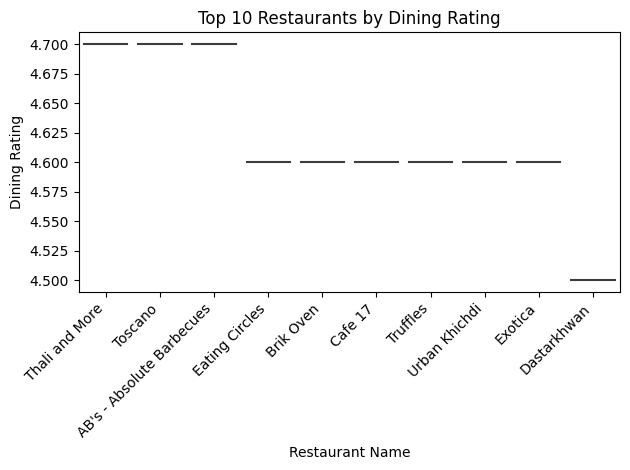

In [ ]:
# Assuming 'sorted_dining' is the DataFrame containing the top 10 restaurants and their dining ratings
# Replace this with the actual DataFrame you want to visualize

restaurant = sorted_dining['Restaurant Name']
ratings = sorted_dining['Dining Rating']

sns.violinplot(x=restaurant, y=ratings)
plt.xlabel('Restaurant Name')
plt.ylabel('Dining Rating')
plt.title('Top 10 Restaurants by Dining Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top Restaurant by Delivery Rating

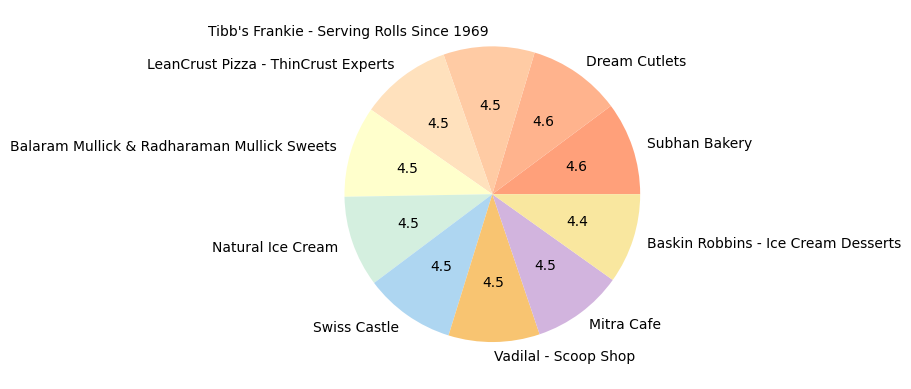

In [ ]:
rest_delivery= df.groupby('Restaurant Name')['Delivery Rating'].mean().reset_index()
sorted_delivery= rest_delivery.sort_values('Delivery Rating', ascending=False).head(10)

rest_name=sorted_delivery['Restaurant Name']
delivery_rating=sorted_delivery['Delivery Rating']

colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']

_,_,autotexts=plt.pie(delivery_rating, labels=rest_name, colors= colors, autopct='')

for i, delivery_rating in enumerate(delivery_rating):
    autotexts[i].set_text(f'{delivery_rating:.1f}')

plt.show()

# Common & Popular Dishes

In [ ]:
dishes= df['Item Name'].value_counts().head(20)
a=pd.DataFrame(dishes)
print('Popular Dishes :- \n\n',a)

Popular Dishes :- 

                       Item Name
Veg Fried Rice              322
Paneer Butter Masala        319
Chicken Fried Rice          278
Jeera Rice                  231
Chicken Biryani             226
French Fries                211
Butter Naan                 198
Egg Fried Rice              197
Veg Biryani                 188
Chicken 65                  181
Dal Fry                     172
Egg Biryani                 172
Dal Tadka                   166
Mutton Biryani              154
Butter Chicken              149
Margherita Pizza            146
Paneer Tikka Masala         140
Cold Coffee                 137
Tandoori Chicken            135
Paneer 65                   133


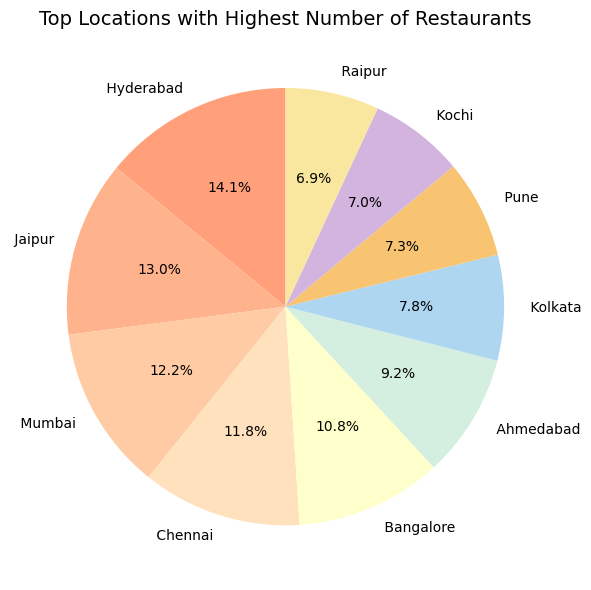

In [ ]:
# This code calculates the number of restaurants in each location and creates a pie chart to visualize the distribution.

# The variable "location_counts" is obtained by using the value_counts() method on the 'City' column of the DataFrame.
# It counts the number of occurrences of each unique location and selects the top 10 using the head() function.

# Calculate number of restaurants in each location
location_counts = df['City'].value_counts().head(10)
colors = ['#FFA07A', '#FFB38D', '#FFCBA4', '#FFE1BD', '#FFFFCC', '#D4EFDF', '#AED6F1', '#F8C471', '#D2B4DE', '#F9E79F']

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', startangle=90,colors = colors)

plt.title('Top Locations with Highest Number of Restaurants', fontsize=14)

plt.tight_layout()

# Show plot
plt.show()

* The pie chart provides a visual representation of the distribution of restaurants across different locations. You can observe the proportion of restaurants in each location and identify the dominant locations.
* By analyzing the sizes of the pie slices, you can determine which locations have a larger concentration of restaurants. Locations with a larger slice indicate a higher number of restaurants compared to others.
* The pie chart helps identify locations with a higher number of restaurants, indicating potentially more competition in those areas. This information can be useful for understanding market saturation and identifying areas with potential opportunities for new restaurant ventures.

